# Short Tank Results Analysis - Hichem Lahiouel

In this notebook, I am analyzing the training results that have been done on 2 classes, namely e's and gammas. 

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

In [4]:
# Defining the plotting parameters 

c = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Sets the color of the prop_cylce of the axes
label_dict = {"$\gamma$":0, "$e$":1} # Creates a dictionary for the labels
inverse_label_dict = {0:"$\gamma$", 1:"$e$"} # Inverts the dictionary created in the previous line  

In [7]:
# Define run locations

mp_locs = ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-27/17-02-44/outputs',
           '/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-02-01/10-10-25/outputs'
          ]

mp_titles = ['Short Tank Data - 2 Classes (e vs gamma) Jan 27',
             'Short Tank Data - 2 Classes (e vs gamma) Feb 1'
            ]

new_locs = []

new_titles = []

"""
new_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7],c[8],c[9]]
new_linestyle = ['--','--','--','--','--','--','--','--','--','--']

old_linecolor = [c[0],c[1],c[2],c[3],c[4],c[5],c[6],c[7]]
old_linestyle = [':',':',':',':',':',':',':',':']
"""

mp_linecolor = [c[0] for _ in mp_locs]
mp_linestyle = ['--' for _ in mp_locs]

new_linecolor = [c[1] for _ in new_locs]
new_linestyle = [':' for _ in new_locs]

locs = mp_locs + new_locs
titles = mp_titles + new_titles
linecolor = mp_linecolor + new_linecolor
linestyle = mp_linestyle + new_linestyle

i:  0
Found training logs:  ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-01-27/17-02-44/outputs/log_train_0.csv']
i:  1
Found training logs:  ['/home/hlahiouel/WatChMaL_analysis/WatChMaL/outputs/2021-02-01/10-10-25/outputs/log_train_0.csv']


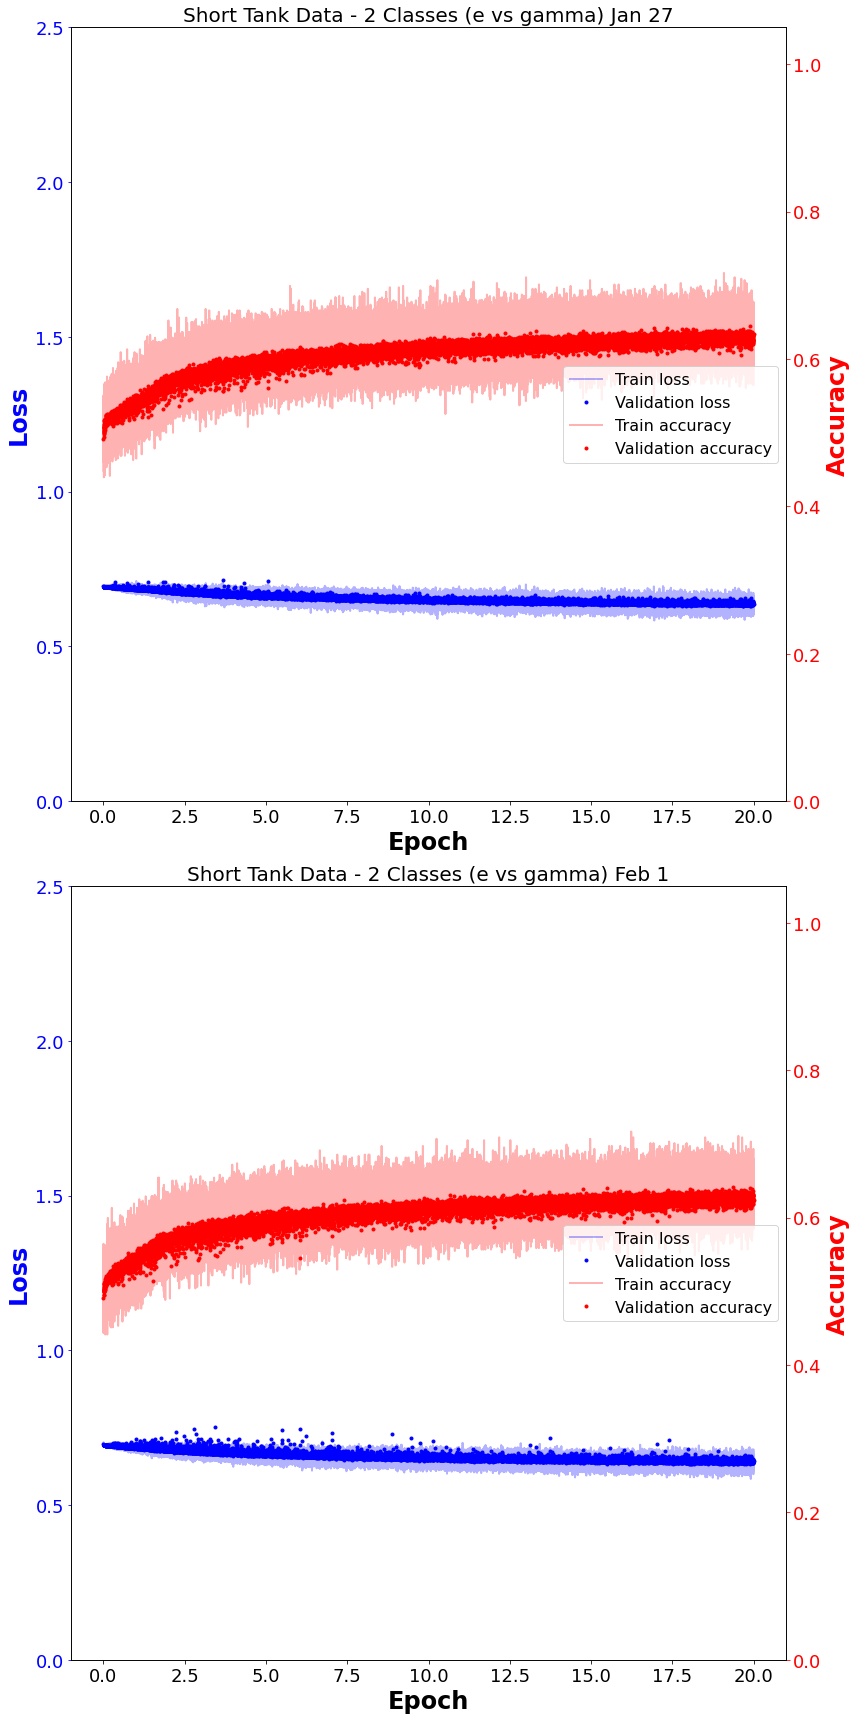

In [8]:
fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [9]:
# Load new run data

idx_file_path = '/home/hlahiouel/IWCD_mPMT_Short_2_class_e_gamma_veto_idxs.npz'
# Path to the file containing the indices for the different datasets 

indices = np.load(idx_file_path)['test_idxs'] # Loads the indices for the test set 

cut_path = '/home/hlahiouel/pointnet_cut_indices.npz' # Path to the indices for the cuts 

cuts_to_apply= []

mp_raw_output_softmax = [np.load(loc + "/softmax.npy") for loc in mp_locs] 
# Loads the softmax data from the outputs folder

mp_raw_actual_labels  = [np.load(loc + "/labels.npy") for loc in mp_locs]
# Loads the labels 


In [10]:
# Load old run data

new_outputs = [load_test_output_pn(os.path.join(loc,'test_validation_iteration_dump.npz'),
                                   cut_path,
                                   np.load(idx_file_path)['test_idxs'], cut_list=[])
               for i, loc in enumerate(new_locs)]

# Creates new output data  

new_raw_output_softmax   = [output["softmax"] for output in new_outputs] # Loads softmax data 
new_raw_actual_labels    = [output["labels"] for output in new_outputs]  # Loads labels 

In [11]:
# Combine run data

#raw_predicted_labels = mp_raw_predicted_labels + new_raw_predicted_labels

raw_output_softmax   = mp_raw_output_softmax + new_raw_output_softmax # Loads softmax data
raw_actual_labels    = mp_raw_actual_labels + new_raw_actual_labels   # Loads labels 

In [12]:
# Apply cuts to data

#predicted_labels = multi_get_masked_data(raw_predicted_labels, cut_path, indices, cuts_to_apply)

output_softmax   = multi_get_masked_data(raw_output_softmax, cut_path, indices, cuts_to_apply) # Loads softmax data
actual_labels    = multi_get_masked_data(raw_actual_labels, cut_path, indices, cuts_to_apply)  # Loads the labels

In [13]:
# Plot multi e/gamma ROC

fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"]) 

# Computes the ROC curve for electron vs gamma  

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


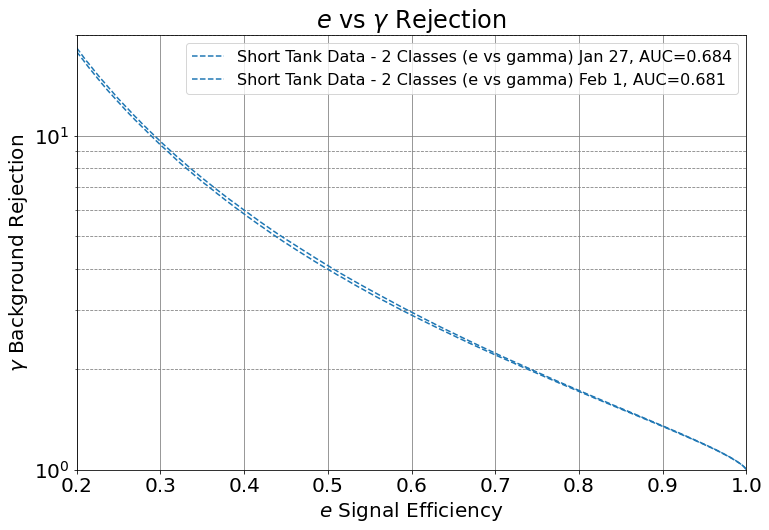

In [14]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], xlims=[[0.2,1.0]],ylims=[[1e0,2e1]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

# Creates a plot of the ROC/AUC curve for e vs gamma rejection 